In [1]:
import numpy as np
import math 
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D
rc('animation', html='jshtml')

In [2]:
def convert_to_list(matrica):
  matrica_kao_lista=[]
  for i in range(3):
    red=[]
    red.append(matrica[i,0])
    red.append(matrica[i,1])
    red.append(matrica[i,2])
    matrica_kao_lista.append(red)
  return matrica_kao_lista
def check_matrix(A):
  A=np.matrix(A)
  should_be_identity = np.allclose(A.dot(A.T), np.identity(3, np.float))
  should_be_one = np.allclose(np.linalg.det(A), 1)
  return should_be_identity and should_be_one
def norm(product):
   return np.sqrt(np.sum(product**2))
def normalize_vector(product):
  return product / norm(product)
# trazi sopstveni vektor matrice za lambda=1
def SopsVec(A):
    R=A-np.identity(3)
    product1=np.cross(R[0],R[1])
    product2=np.cross(R[1],R[2])
    product3=np.cross(R[0],R[2])
    if(any(product1)):
      product1=normalize_vector(product1)
      return product1
    elif(any(product2)):
      product2=normalize_vector(product2)
      return product2
    else:
      product3=normalize_vector(product3)
      return product3
# fja trazi vektor koji je normalan na prosledjeni vektor
def perpendicular_vector(v):
    if v[1] == 0 and v[2] == 0:
        if v[0] == 0:
            raise ValueError('zero vector')
        else:
            return np.cross(v, [0, 1, 0])
    return np.cross(v, [1, 0, 0])
def Euler2A(fi,teta,psi):
  oko_x=np.matrix([[1,0,0],[0,math.cos(fi),-math.sin(fi)],[0,math.sin(fi),math.cos(fi)]])
  oko_y=np.matrix([[math.cos(teta),0,math.sin(teta)],[0,1,0],[-math.sin(teta),0,math.cos(teta)]])
  oko_z=np.matrix([[math.cos(psi),-math.sin(psi),0],[math.sin(psi),math.cos(psi),0],[0,0,1]])
  #A = np.dot(oko_z,np.dot(oko_y,oko_x))
  A= oko_z @ (oko_y @ oko_x)
  return A
def A2AxisAngle(P):
  p=SopsVec(P)
  u=perpendicular_vector(p) #normalan na p
  uprim=P @ u
  fi=math.acos(   np.sum(np.dot(u,uprim))/(norm(u)*norm(uprim))   )
  mesoviti_proizvod= np.sum(u @ (np.cross(uprim,p)))
  if(mesoviti_proizvod<0):
    p=-p
  return p,fi
def AngleAxis2Q(p,fi):
  w=math.cos(fi/2)
  p=normalize_vector(np.array(p))
  [x,y,z]=math.sin(fi/2)*p
  q=[x,y,z,w]
  return q
def Q2AxisAngle(q):
  q=normalize_vector(np.array(q))
  if(q[3]<0):
    q=-q 
  fi=2*math.acos(q[3])
  if (q[3]==1 or q[3]==-1):
    p=[1,0,0]
  else:
    p=normalize_vector(np.array([q[0],q[1],q[2]]))
  return p,fi
def Rodrigez(p,fi):
  px=np.array([[0,-p[2],p[1]],[p[2],0,-p[0]],[-p[1],p[0],0]])
  ppt = np.matmul(np.array([p]).T,[p])
  R=ppt+math.cos(fi)*(np.eye(3)-ppt)+math.sin(fi)*px
  return R
def Euler2Q(fi,teta,psi):
    mat = Euler2A(fi, teta, psi)
    mat=convert_to_list(mat)
    p,fi = A2AxisAngle(mat)
    q = np.array(AngleAxis2Q(p, fi))
    return q

In [3]:
def apply_quaternion(v, q):
  p, phi = Q2AxisAngle(q)
  M = Rodrigez(p, phi)
  t = M @ v
  return t
def lerp(q1, q2, t, tm):
    pom = t/tm
    rez = (1- pom)*q1 + pom*q2
    return rez
def slerp(q0, q, iter, tm):
    pom = normalize_vector(q0)
    pom1 = normalize_vector(q)
    cosFi = np.sum(np.dot(pom,pom1))/(norm(pom1)*norm(pom))    # skalarniProizvodQ(q0, q)
    if cosFi < 0:
        pom = -1 * pom
        cosFi = -cosFi
    if cosFi>0.95:
        return pom
    fi = math.acos(cosFi)
    sinfi = math.sin(fi)
    qs = math.sin(fi*(1-(iter/tm)))/sinfi*pom + math.sin(fi * (iter/tm))/sinfi*pom1 
    return qs

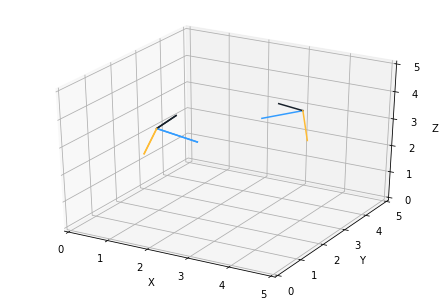

In [4]:
a = np.array([1,2,3])
b = np.array([4,3,4])
fi,teta,psi=120,30,30
fi1,teta1,psi1=12,180,60
#q0 = np.array([0,0,1,0])*1.0
#q1 = np.array([0,math.sqrt(2)/2,0,math.sqrt(2)/2])
n = 10
'''
print("Unesite podatke za pocetno stanje")
a1=int(input("Unesite koodrinatu x centra "))
a2=int(input("Unesite koodrinatu y centra "))
a3=int(input("Unesite koodrinatu z centra "))
a=np.array([a1,a2,a3])
fi=int(input("Unesite ugao fi "))
teta=int(input("Unesite ugao teta "))
psi=int(input("Unesite ugao psi "))
'''
fi=math.radians(fi)
teta=math.radians(teta)
psi=math.radians(psi)
q0=Euler2Q(fi,teta,psi)

'''
print("Unesite podatke za trazeno stanje")
b1=int(input("Unesite koodrinatu x centra "))
b2=int(input("Unesite koodrinatu y centra "))
b3=int(input("Unesite koodrinatu z centra "))
b=np.array([b1,b2,b3])
fi1=int(input("Unesite ugao fi "))
teta1=int(input("Unesite ugao teta "))
psi1=int(input("Unesite ugao psi "))
'''
fi1=math.radians(fi1)
teta1=math.radians(teta1)
psi1=math.radians(psi1)
q1=Euler2Q(fi1,teta1,psi1)


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.axis('off')
colors=["#339CFF","#17202A","#FFBB33"]
lines = sum([ax.plot([], [], [], c=c) for c in colors], [])

startpoints = np.array([[0,0,0], [0,0,0], [0,0,0]])
endpoints = np.array([[1,0,0], [0,1,0], [0,0,1]])

ax.set_xlim((0, 5))
ax.set_ylim((0, 5))
ax.set_zlim((0, 5))
for start, end,color in zip(startpoints, endpoints,colors):
  start = apply_quaternion(start, q0)
  end = apply_quaternion(end, q0)
  start += a
  end += a
  ax.plot([start[0],end[0]], [start[1],end[1]],zs=[start[2],end[2]], color=color)

for start, end,color in zip(startpoints, endpoints,colors):
	start = apply_quaternion(start, q1)
	end = apply_quaternion(end, q1)
	start += b
	end += b
	ax.plot([start[0],end[0]], [start[1],end[1]],zs=[start[2],end[2]], color=color)

def animate(i):
  q = slerp(q0, q1,i,n)
  move=lerp(a, b, i, n)
  for line, start, end in zip(lines, startpoints, endpoints):
    start = apply_quaternion(start, q)
    end = apply_quaternion(end, q)
    start+=move
    end+=move
    line.set_data([start[0], end[0]], [start[1], end[1]])
    line.set_3d_properties([start[2], end[2]])
  fig.canvas.draw()
  return lines
anim = animation.FuncAnimation(fig, animate, frames=n+1, blit=False, repeat=False)
anim.save('animacija.gif', writer = "pillow", fps=10 )
anim